#### (1) 데이터 가져오기
---
* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 상세히 확인할 수 있습니다.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

csv_path = os.getenv("HOME") + "/data/data/bike-sharing-demand/train.csv"
original_data = pd.read_csv(csv_path)

bike_demand = original_data.copy()
print(bike_demand.shape)
bike_demand.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
---
* to_datetime 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
* pandas datetime extract year month day 키워드로 검색해 보기


In [3]:
datetime_se = pd.to_datetime(bike_demand['datetime'])
for i, timestamp in enumerate(datetime_se):
    datetime = str(timestamp)
    date, time = datetime.split(" ")
    year, month, day = date.split("-")
    hour, minute, second = time.split(":")
    
    bike_demand.loc[i, 'year'] = year; bike_demand.loc[i, 'month'] = month; bike_demand.loc[i, 'day'] = day; 
    bike_demand.loc[i, 'hour'] = hour; bike_demand.loc[i, 'minute'] = minute; bike_demand.loc[i, 'second'] = second; 
bike_demand[['year', 'month', 'day', 'hour', 'minute', 'second']].head()
# # to_datetime으로 datetime 열 변환
# datetime_se = pd.to_datetime(bike_demand['datetime'])

# # dt 접근자를 사용하여 각 구성요소 추출
# bike_demand['year'] = datetime_se.dt.year
# bike_demand['month'] = datetime_se.dt.month 
# bike_demand['day'] = datetime_se.dt.day
# bike_demand['hour'] = datetime_se.dt.hour
# bike_demand['minute'] = datetime_se.dt.minute
# bike_demand['second'] = datetime_se.dt.second

# # 결과 확인
# bike_demand[['year', 'month', 'day', 'hour', 'minute', 'second']]

,year,month,day,hour,minute,second
0,2011,01,01,00,00,00
1,2011,01,01,01,00,00
2,2011,01,01,02,00,00
3,2011,01,01,03,00,00
4,2011,01,01,04,00,00


#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
---
* sns.countplot 활용해서 시각화하기
*subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기


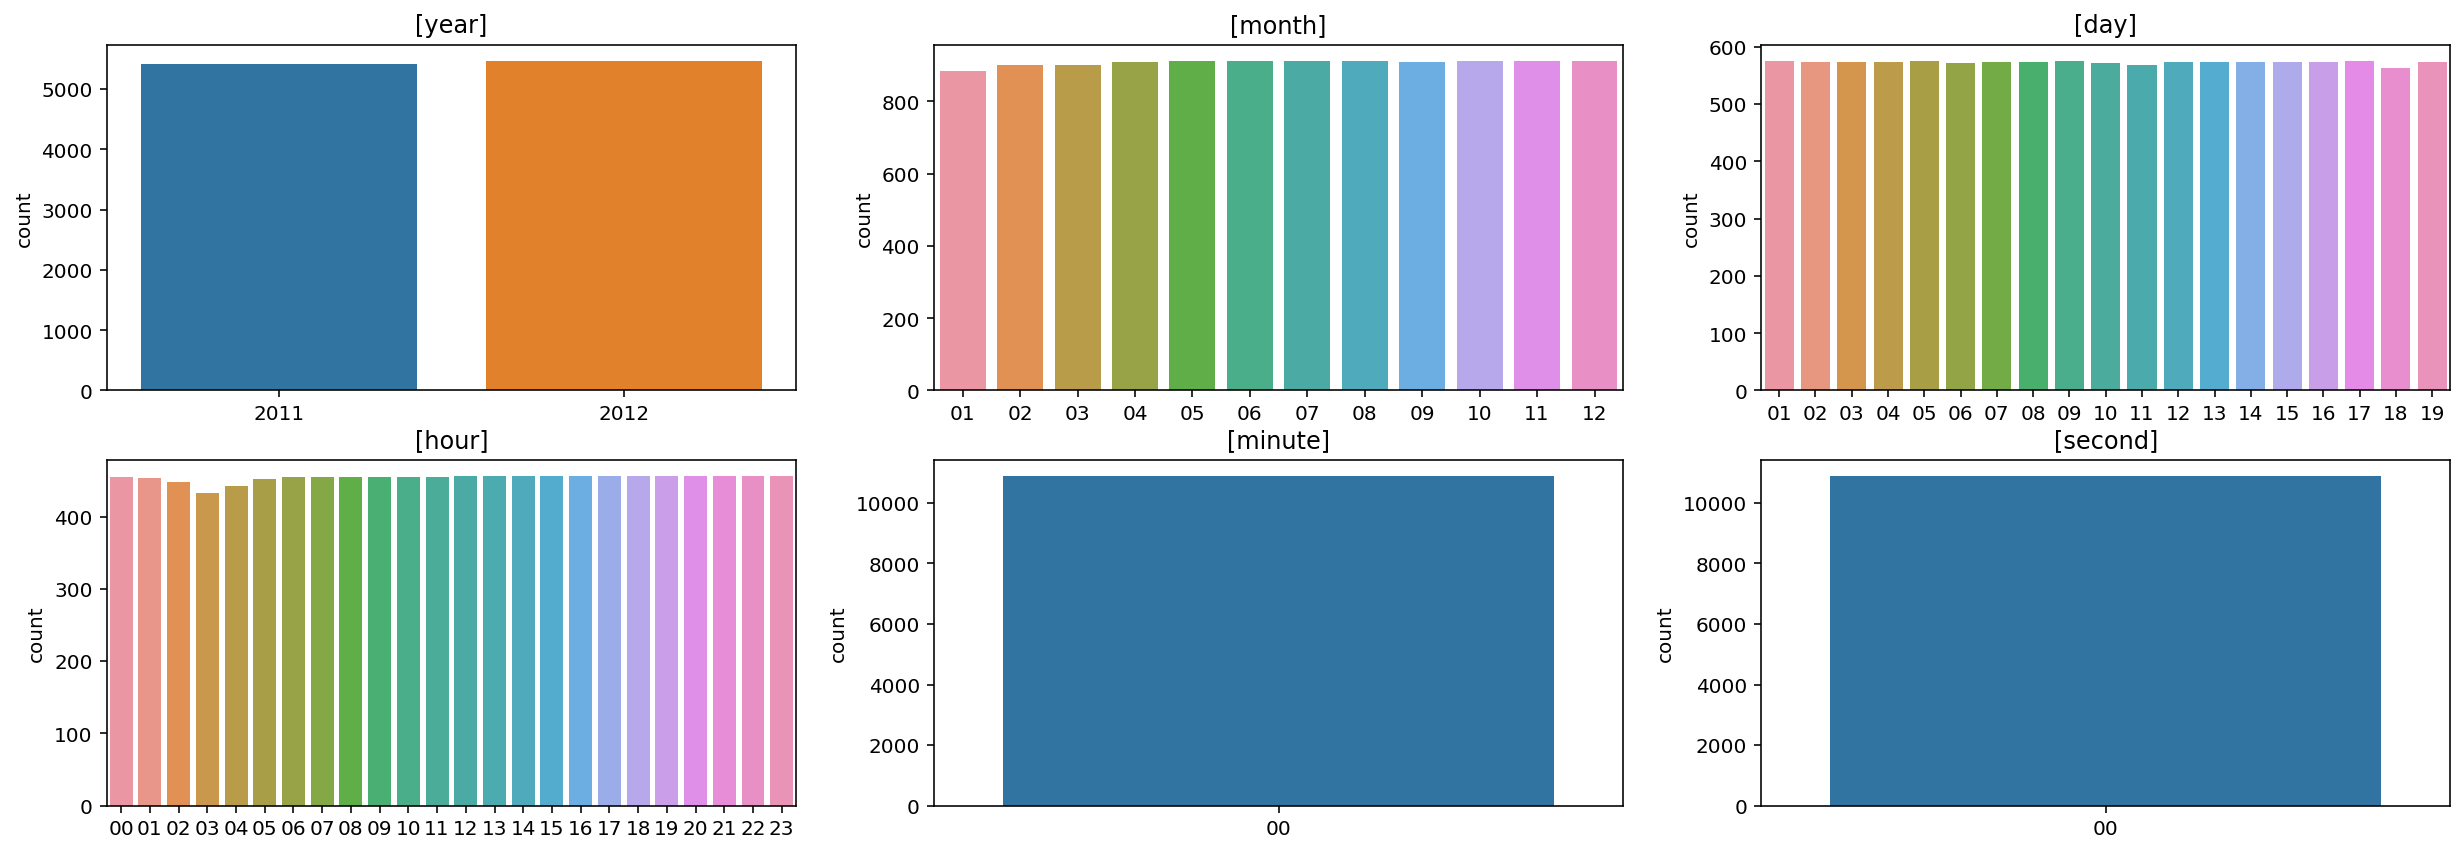

In [4]:
plt.figure(figsize = (21, 7))

plt.subplot(231)
sns.countplot(data = bike_demand, x = 'year').set_xlabel("")
plt.title("[year]")
plt.subplot(232)
sns.countplot(data = bike_demand, x = 'month').set_xlabel("")
plt.title("[month]")
plt.subplot(233)
sns.countplot(data = bike_demand, x = "day").set_xlabel("")
plt.title("[day]")
plt.subplot(234)
sns.countplot(data = bike_demand, x = "hour").set_xlabel("")
plt.title("[hour]")
plt.subplot(235)
sns.countplot(data = bike_demand, x = "minute").set_xlabel("")
plt.title("[minute]")
plt.subplot(236)
sns.countplot(data = bike_demand, x = "second").set_xlabel("")
plt.title("[second]")

plt.show()

#### (4) X, y 컬럼 선택 및 train/test 데이터 분리
---
* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기



In [5]:
bike_demand = pd.get_dummies(bike_demand, columns = ['year', 'month', 'day', 'hour', 'minute', 'second'])
y = bike_demand['count'].values
bike_demand.drop(['datetime', 'count', 'casual', 'registered'], axis = 1, inplace = True)# 1. 다 넣어-['datetime', 'count'] 2. casual,registered 컬럼 같이 제거
X = bike_demand.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# print(bike_demand.columns)

(8708, 67) (8708,)
(2178, 67) (2178,)


#### (5) LinearRegression 모델 학습
---
* sklearn의 LinearRegression 모델 불러오기 및 학습하기


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
---
* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기


In [28]:
predictions = model.predict(X_test)
print(predictions)

mse = mean_squared_error(y_test, predictions)
mse

rmse = np.sqrt(mse)
rmse

[235.46607625  20.00960277 362.43987836 ... 305.51223499 -30.31421261
 298.02554498]


100.51096938571187

#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---
* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기


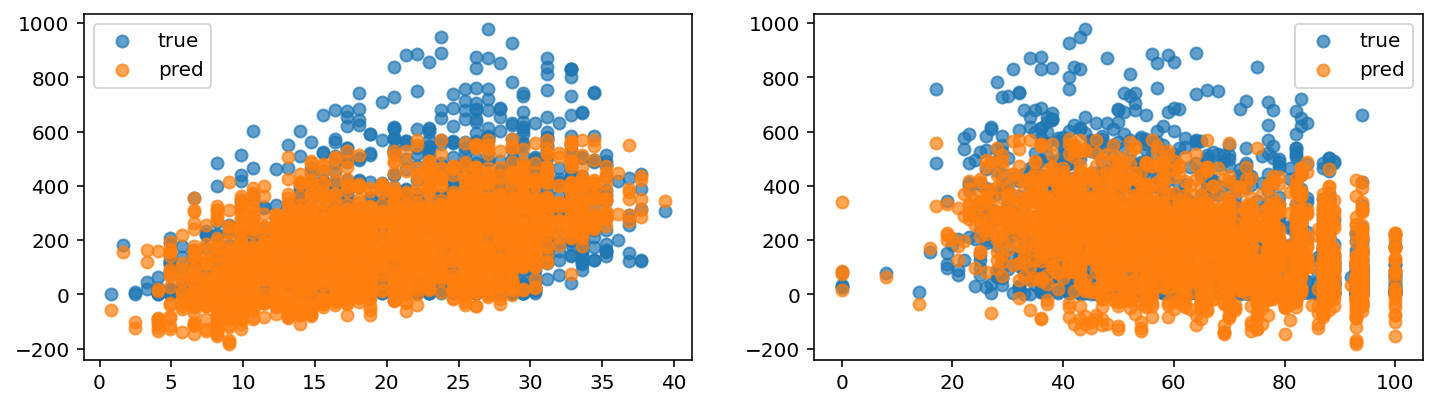

In [8]:
plt.figure(figsize = (12, 7))

plt.subplot(221)
plt.scatter(X_test[:, 4], y_test, label = "true", alpha = 0.7)
plt.scatter(X_test[:, 4], predictions, label = "pred", alpha = 0.7)
plt.legend()

plt.subplot(222)
plt.scatter(X_test[:, 6], y_test, label = "true", alpha = 0.7)
plt.scatter(X_test[:, 6], predictions, label = "pred", alpha = 0.7)
plt.legend()
# # 아래의 그래프는 겹침이 심하기 때문에 대조군으로 출력-1. ['datetime', 'count']
# plt.subplot(223)
# plt.scatter(X_test[:, 4], y_test, label = "true")
# plt.legend()

# plt.subplot(224)
# plt.scatter(X_test[:, 6], y_test, label = "true")
# plt.legend()
# plt.show()